### Libraries import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Style

In [3]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [4]:
dataset = pd.read_csv('./../data/fuoriuscita/vittime_1522/Vittime, sesso, età, regione (2013-2022).csv')

dataset

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2013,2013,11,NaN,NaN
1,IT,Italia,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2014,2014,6,NaN,NaN
2,IT,Italia,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2015,2015,4,NaN,NaN
3,IT,Italia,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2016,2016,3,NaN,NaN
4,IT,Italia,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2017,2017,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6742,ITNI,Non indicato,VICTIMS,vittime di violenza,T,totale,UNAV,non disponibile,2022,2022,892,NaN,NaN
6743,ITD4,Friuli-Venezia Giulia,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2022,2022,1,NaN,NaN
6744,ITF1,Abruzzo,VICTIMS,vittime di violenza,M,maschi,Y_UN17,fino a 17 anni,2022,2022,1,NaN,NaN
6745,ITC2,Valle d'Aosta / Vallée d'Aoste,VICTIMS,vittime di violenza,M,maschi,Y18-24,18-24 anni,2022,2022,1,NaN,NaN


Ottenimento dati nazionali rimovendo distinizione regionale ed eliminazione di dati inutili e/o ridondanti:

In [5]:
country_data = dataset[dataset['ITTER107'] == 'IT'] # ottiene solo dati nazionali

# rimozione di:
# - "Seleziona periodo" e "Sesso" che contengono dati ridondanti rispettivamente di "TIME" e "SEXISTAT1"
# - "ITTER107" e "Territorio" in quanto non vi è più alcuna distinzione, i dati mantenuti sono tutti nazionali
# - "Flag Codes" e "Flags" in quanto inutili
# - "TIPO_DATO_1522" e "Tipo dato" in quanto non utilizzati e ridondanti
country_data = country_data.drop(columns=['Seleziona periodo', 'Sesso', 'Flag Codes', 'Flags', 'Territorio', 'ITTER107', 'TIPO_DATO_1522', 'Tipo dato'])

country_data

,SEXISTAT1,ETA1,Classe di età,TIME,Value
0,M,Y_UN17,fino a 17 anni,2013,11
1,M,Y_UN17,fino a 17 anni,2014,6
2,M,Y_UN17,fino a 17 anni,2015,4
3,M,Y_UN17,fino a 17 anni,2016,3
4,M,Y_UN17,fino a 17 anni,2017,4
...,...,...,...,...,...
6072,T,UNAV,non disponibile,2018,1039
6073,T,UNAV,non disponibile,2019,661
6074,T,UNAV,non disponibile,2020,4141
6075,T,UNAV,non disponibile,2021,4482


Rimozione dei dati totali (aggregati) o non definiti per l'età:

In [6]:
country_data = country_data[(country_data["ETA1"] != 'UNAV') & (country_data["ETA1"] != 'NSP') & (country_data["ETA1"] != 'TOTAL')]

country_data

,SEXISTAT1,ETA1,Classe di età,TIME,Value
0,M,Y_UN17,fino a 17 anni,2013,11
1,M,Y_UN17,fino a 17 anni,2014,6
2,M,Y_UN17,fino a 17 anni,2015,4
3,M,Y_UN17,fino a 17 anni,2016,3
4,M,Y_UN17,fino a 17 anni,2017,4
...,...,...,...,...,...
4121,T,Y_GE65,65 anni e più,2018,796
4122,T,Y_GE65,65 anni e più,2019,639
4123,T,Y_GE65,65 anni e più,2020,1285
4124,T,Y_GE65,65 anni e più,2021,1367


Separazione dati per genere:

In [7]:
# nella separazione dei dati viene rimossa la colonna relativa al sesso in quanto ora intrinseca
# nei relativi dataframe e la colonna con il codice dell'età in quanto verrà utilizzata
# quella più user readable
males_country_data = country_data[country_data['SEXISTAT1'] == 'M'].iloc[:, 2:]
females_country_data = country_data[country_data['SEXISTAT1'] == 'F'].iloc[:, 2:]

males_country_data, females_country_data

(       Classe di età  TIME  Value
 0     fino a 17 anni  2013     11
 1     fino a 17 anni  2014      6
 2     fino a 17 anni  2015      4
 3     fino a 17 anni  2016      3
 4     fino a 17 anni  2017      4
 ...              ...   ...    ...
 4101   65 anni e più  2018     28
 4102   65 anni e più  2019     28
 4103   65 anni e più  2020     35
 4104   65 anni e più  2021     34
 4105   65 anni e più  2022     18
 
 [70 rows x 3 columns],
        Classe di età  TIME  Value
 10    fino a 17 anni  2013     90
 11    fino a 17 anni  2014     91
 12    fino a 17 anni  2015     52
 13    fino a 17 anni  2016     51
 14    fino a 17 anni  2017     68
 ...              ...   ...    ...
 4111   65 anni e più  2018    768
 4112   65 anni e più  2019    611
 4113   65 anni e più  2020   1250
 4114   65 anni e più  2021   1333
 4115   65 anni e più  2022    895
 
 [70 rows x 3 columns])

### Plot

In [8]:
# restituisce l'array di anni di cui sono raccolti i dati
def years_of_interest(gender_country_data):
  return gender_country_data['TIME'].drop_duplicates().values

In [9]:
# restituisce una series che contiene i dati da mostrare all'interno del plot
def box_plot_data(gender_country_data, years_of_interest):
  return [gender_country_data[gender_country_data['TIME'] == x].drop(columns=['TIME']).set_index('Classe di età')["Value"] for x in years_of_interest]

In [10]:
# years of the males data
males_years = years_of_interest(males_country_data)

# years of the females data
females_years = years_of_interest(females_country_data)

males_years, females_years

(array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]),
 array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]))

In [11]:
# array of series containing the data to be shown
males_box_plot_data = box_plot_data(males_country_data, males_years)

# array of series containing the data to be shown
females_box_plot_data = box_plot_data(females_country_data, females_years)

males_box_plot_data, females_box_plot_data

([Classe di età
  fino a 17 anni     11
  18-24 anni         94
  25-34 anni        211
  35-44 anni        317
  45-54 anni        228
  55-64 anni         84
  65 anni e più      90
  Name: Value, dtype: int64,
  Classe di età
  fino a 17 anni      6
  18-24 anni         33
  25-34 anni         76
  35-44 anni        101
  45-54 anni         73
  55-64 anni         46
  65 anni e più      29
  Name: Value, dtype: int64,
  Classe di età
  fino a 17 anni     4
  18-24 anni        18
  25-34 anni        42
  35-44 anni        60
  45-54 anni        78
  55-64 anni        25
  65 anni e più     37
  Name: Value, dtype: int64,
  Classe di età
  fino a 17 anni     3
  18-24 anni        24
  25-34 anni        48
  35-44 anni        76
  45-54 anni        59
  55-64 anni        33
  65 anni e più     23
  Name: Value, dtype: int64,
  Classe di età
  fino a 17 anni     4
  18-24 anni        17
  25-34 anni        56
  35-44 anni        66
  45-54 anni        42
  55-64 anni        24
  65 ann

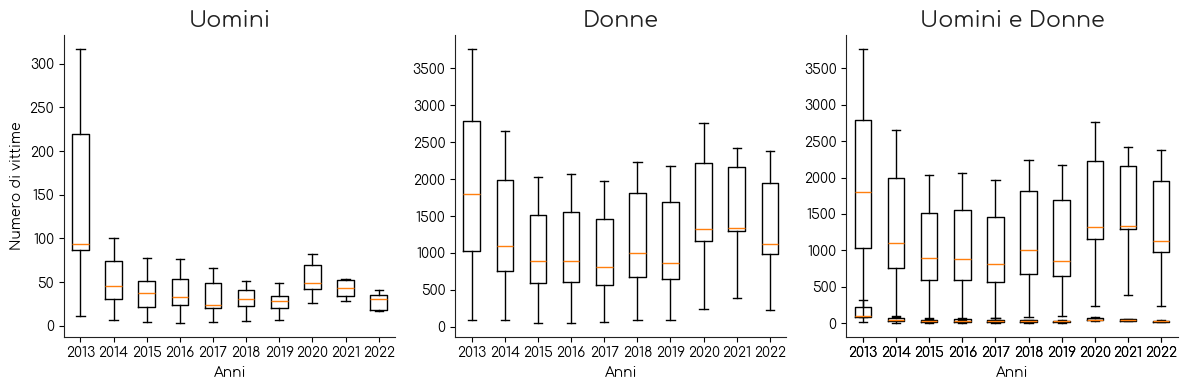

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# males box plot
axs[0].set_title('Uomini')
axs[0].set_ylabel('Numero di vittime')
axs[0].set_xlabel('Anni')
axs[0].boxplot(males_box_plot_data, positions=males_years)

# females box plot
axs[1].set_title('Donne')
axs[1].set_xlabel('Anni')
axs[1].boxplot(females_box_plot_data, positions=females_years)

# overlapped box plots
axs[2].set_title('Uomini e Donne')
axs[2].set_xlabel('Anni')
axs[2].boxplot(males_box_plot_data, positions=males_years)
axs[2].boxplot(females_box_plot_data, positions=females_years)

plt.tight_layout()
plt.show()

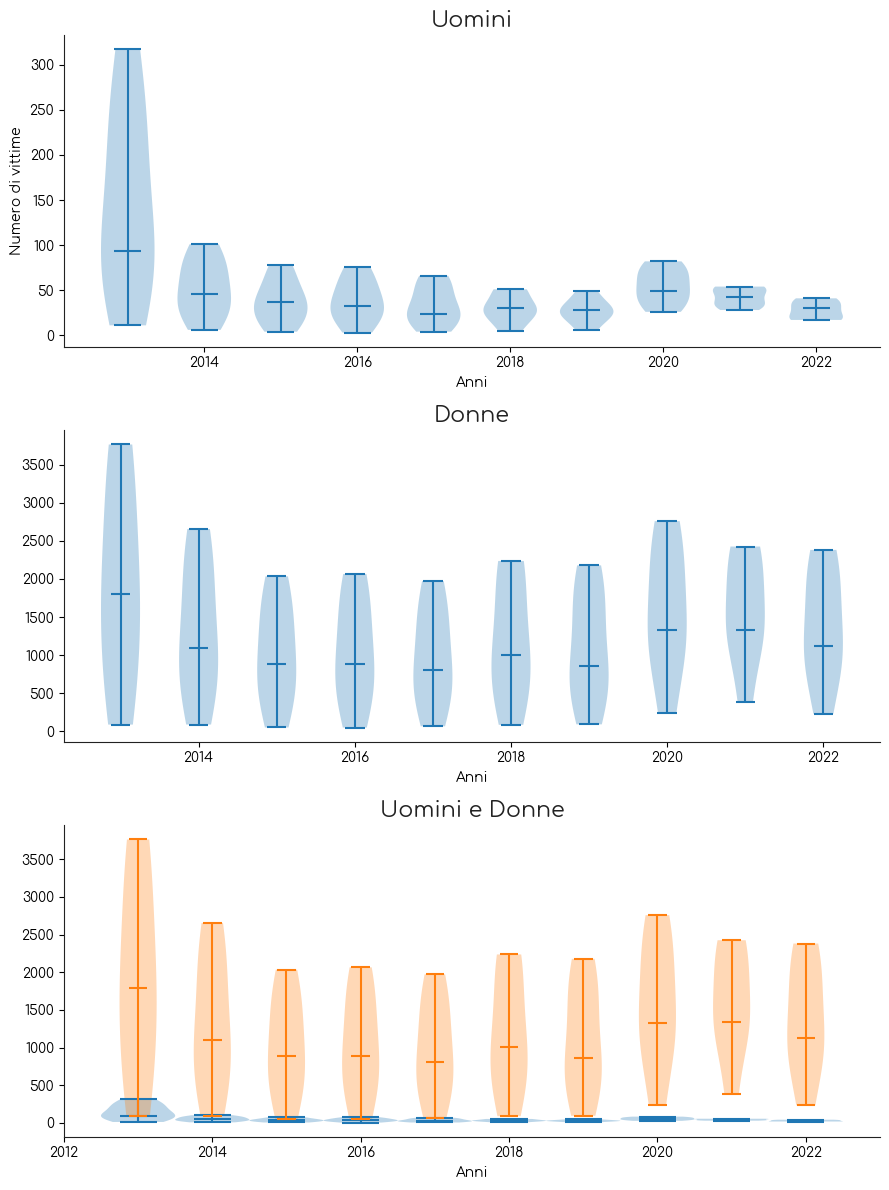

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(9, 12))

# males box plot
axs[0].set_title('Uomini')
axs[0].set_ylabel('Numero di vittime')
axs[0].set_xlabel('Anni')
males_violinplot = axs[0].violinplot(males_box_plot_data, widths=0.7, positions=males_years, showmedians=True, showmeans=False, showextrema=True)

# females box plot
axs[1].set_title('Donne')
axs[1].set_xlabel('Anni')
axs[1].violinplot(females_box_plot_data, positions=males_years, showmedians=True, showmeans=False, showextrema=True)

# overlapped box plots
axs[2].set_title('Uomini e Donne')
axs[2].set_xlabel('Anni')
axs[2].violinplot(males_box_plot_data, widths=1, positions=males_years, showmedians=True, showmeans=False, showextrema=True)
axs[2].violinplot(females_box_plot_data, positions=males_years, showmedians=True, showmeans=False, showextrema=True)

plt.tight_layout()
plt.show()

Solo donne:

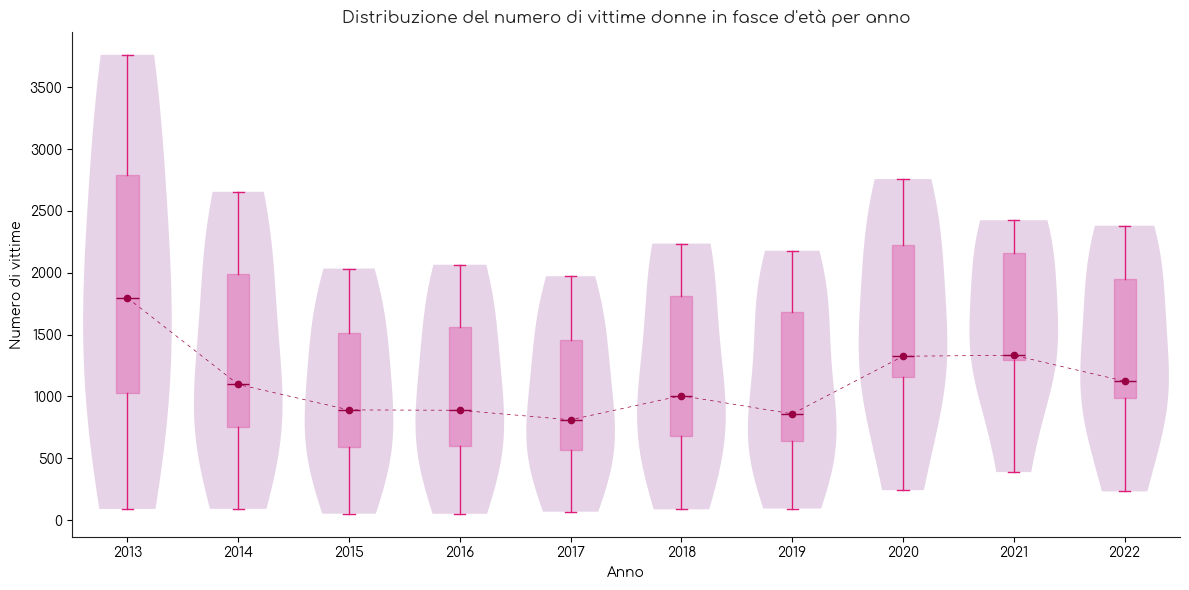

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# violin e box plot
violinplot = ax.violinplot(females_box_plot_data, widths=0.8, positions=males_years, bw_method='scott', showmedians=False, showmeans=False, showextrema=False)
boxplot = ax.boxplot(females_box_plot_data, widths=0.2, positions=females_years, patch_artist=True)
# line plot
medians = [np.median(x.values) for x in females_box_plot_data]
ax.plot(females_years, medians, linestyle=(0, (5, 6)), marker='o', color='#980043', linewidth=0.5, markersize=4.5, markerfacecolor='#980043')

# labels
ax.set_title('Distribuzione del numero di vittime donne in fasce d\'età per anno', fontsize=12)
ax.set_ylabel('Numero di vittime')
ax.set_xlabel('Anno')

# violin plot styling
for v in violinplot['bodies']:
  v.set_facecolor('#D7B6D8')
  v.set_alpha(0.6)

# box plot styling
for element_lists in (boxplot['whiskers'], boxplot['caps']): # colori whiskers e caps
  for element in element_lists:
    element.set_color('#DD1D77')
for b in boxplot['boxes']: # colore box
  b.set_color('#DF65B0')
  b.set_alpha(0.5)
for m in boxplot['medians']: # medians
  m.set_color('#980043')

plt.tight_layout()
plt.show()